In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set() # Pretty graphs.

In [2]:
# Importing BOM data from hardrive.
mel_temp_df = pd.read_csv(r"C:\Users\Bstaj\Documents\BoM\IDCJAC0010_087031_1800\IDCJAC0010_087031_1800_Data.csv")
mel_temp_df.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,87031,1943,1,1,NaN,NaN,NaN
1,IDCJAC0010,87031,1943,1,2,NaN,NaN,NaN
2,IDCJAC0010,87031,1943,1,3,NaN,NaN,NaN
3,IDCJAC0010,87031,1943,1,4,NaN,NaN,NaN
4,IDCJAC0010,87031,1943,1,5,NaN,NaN,NaN


## Time Series Cleaning and Processing:

In [5]:
# Convert dtypes so they can be concatenated.
mel_temp_df["Year"] = mel_temp_df["Year"].astype(dtype = "string")
mel_temp_df["Month"] = mel_temp_df["Month"].astype(dtype = "string")
mel_temp_df["Day"] = mel_temp_df["Day"].astype(dtype = "string")

In [9]:
mel_temp_df["Date"] = mel_temp_df["Year"] + "-" + mel_temp_df["Month"] + "-" + mel_temp_df["Day"] # Date info in one column.

In [10]:
mel_temp_df.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,Date
0,IDCJAC0010,87031,1943,1,1,NaN,NaN,NaN,1943-1-1
1,IDCJAC0010,87031,1943,1,2,NaN,NaN,NaN,1943-1-2
2,IDCJAC0010,87031,1943,1,3,NaN,NaN,NaN,1943-1-3
3,IDCJAC0010,87031,1943,1,4,NaN,NaN,NaN,1943-1-4
4,IDCJAC0010,87031,1943,1,5,NaN,NaN,NaN,1943-1-5


In [15]:
del_list = ["Product code", "Bureau of Meteorology station number", "Year", "Month", "Day", "Days of accumulation of maximum temperature", "Quality"]
mel_temp_df = mel_temp_df.drop(labels = del_list, axis = 1) # Dropping redundant data.
mel_temp_df.head()

,Maximum temperature (Degree C),Date
0,NaN,1943-1-1
1,NaN,1943-1-2
2,NaN,1943-1-3
3,NaN,1943-1-4
4,NaN,1943-1-5


In [27]:
mel_temp_df["Date"] = pd.to_datetime(mel_temp_df["Date"]) # Coverting dates to a datetime object.

In [28]:
mel_temp_df.head()

,Maximum temperature (Degree C),Date
0,NaN,1943-01-01
1,NaN,1943-01-02
2,NaN,1943-01-03
3,NaN,1943-01-04
4,NaN,1943-01-05


In [38]:
mel_temp_df = mel_temp_df.set_index(keys = mel_temp_df.Date) # Making the date column the DF index.

In [40]:
mel_temp_df = mel_temp_df.drop(labels = "Date", axis = 1) # Removing date column now that it is the index.
mel_temp_df.head()

,Maximum temperature (Degree C)
Date,
1943-01-01,NaN
1943-01-02,NaN
1943-01-03,NaN
1943-01-04,NaN
1943-01-05,NaN


In [41]:
mel_temp_df = mel_temp_df.asfreq(freq = "d") # Adding missing dates.

In [42]:
mel_temp_df.isna().sum() # Missing values to be filled or deleted.

Maximum temperature (Degree C)    412
dtype: int64

In [51]:
mel_temp_df = mel_temp_df.iloc[365:] # Removing 1943 as it has way too many missing values.

In [52]:
mel_temp_df = mel_temp_df.fillna(method = "ffill") # Fill remaining missing values with the previous value.
mel_temp_df.isna().sum()

Maximum temperature (Degree C)    0
dtype: int64

In [62]:
def Year_Index(Year): # takes a year of interest and returns the index for slicing the data frame.
    indx = []
    for n in range(0, mel_temp_df.index.shape[0]):
        if mel_temp_df.index[n].year == Year:
            indx.append(n)
    return indx

In [64]:
mel_temp_df.iloc[Year_Index(2001), 0] # Test for the year 2001.

Date
2001-01-01    35.0
2001-01-02    38.0
2001-01-03    30.0
2001-01-04    36.0
2001-01-05    20.0
              ... 
2001-12-27    19.0
2001-12-28    25.0
2001-12-29    36.0
2001-12-30    20.0
2001-12-31    25.0
Freq: D, Name: Maximum temperature (Degree C), Length: 365, dtype: float64

## First Look at the Data on a Time Series Chart

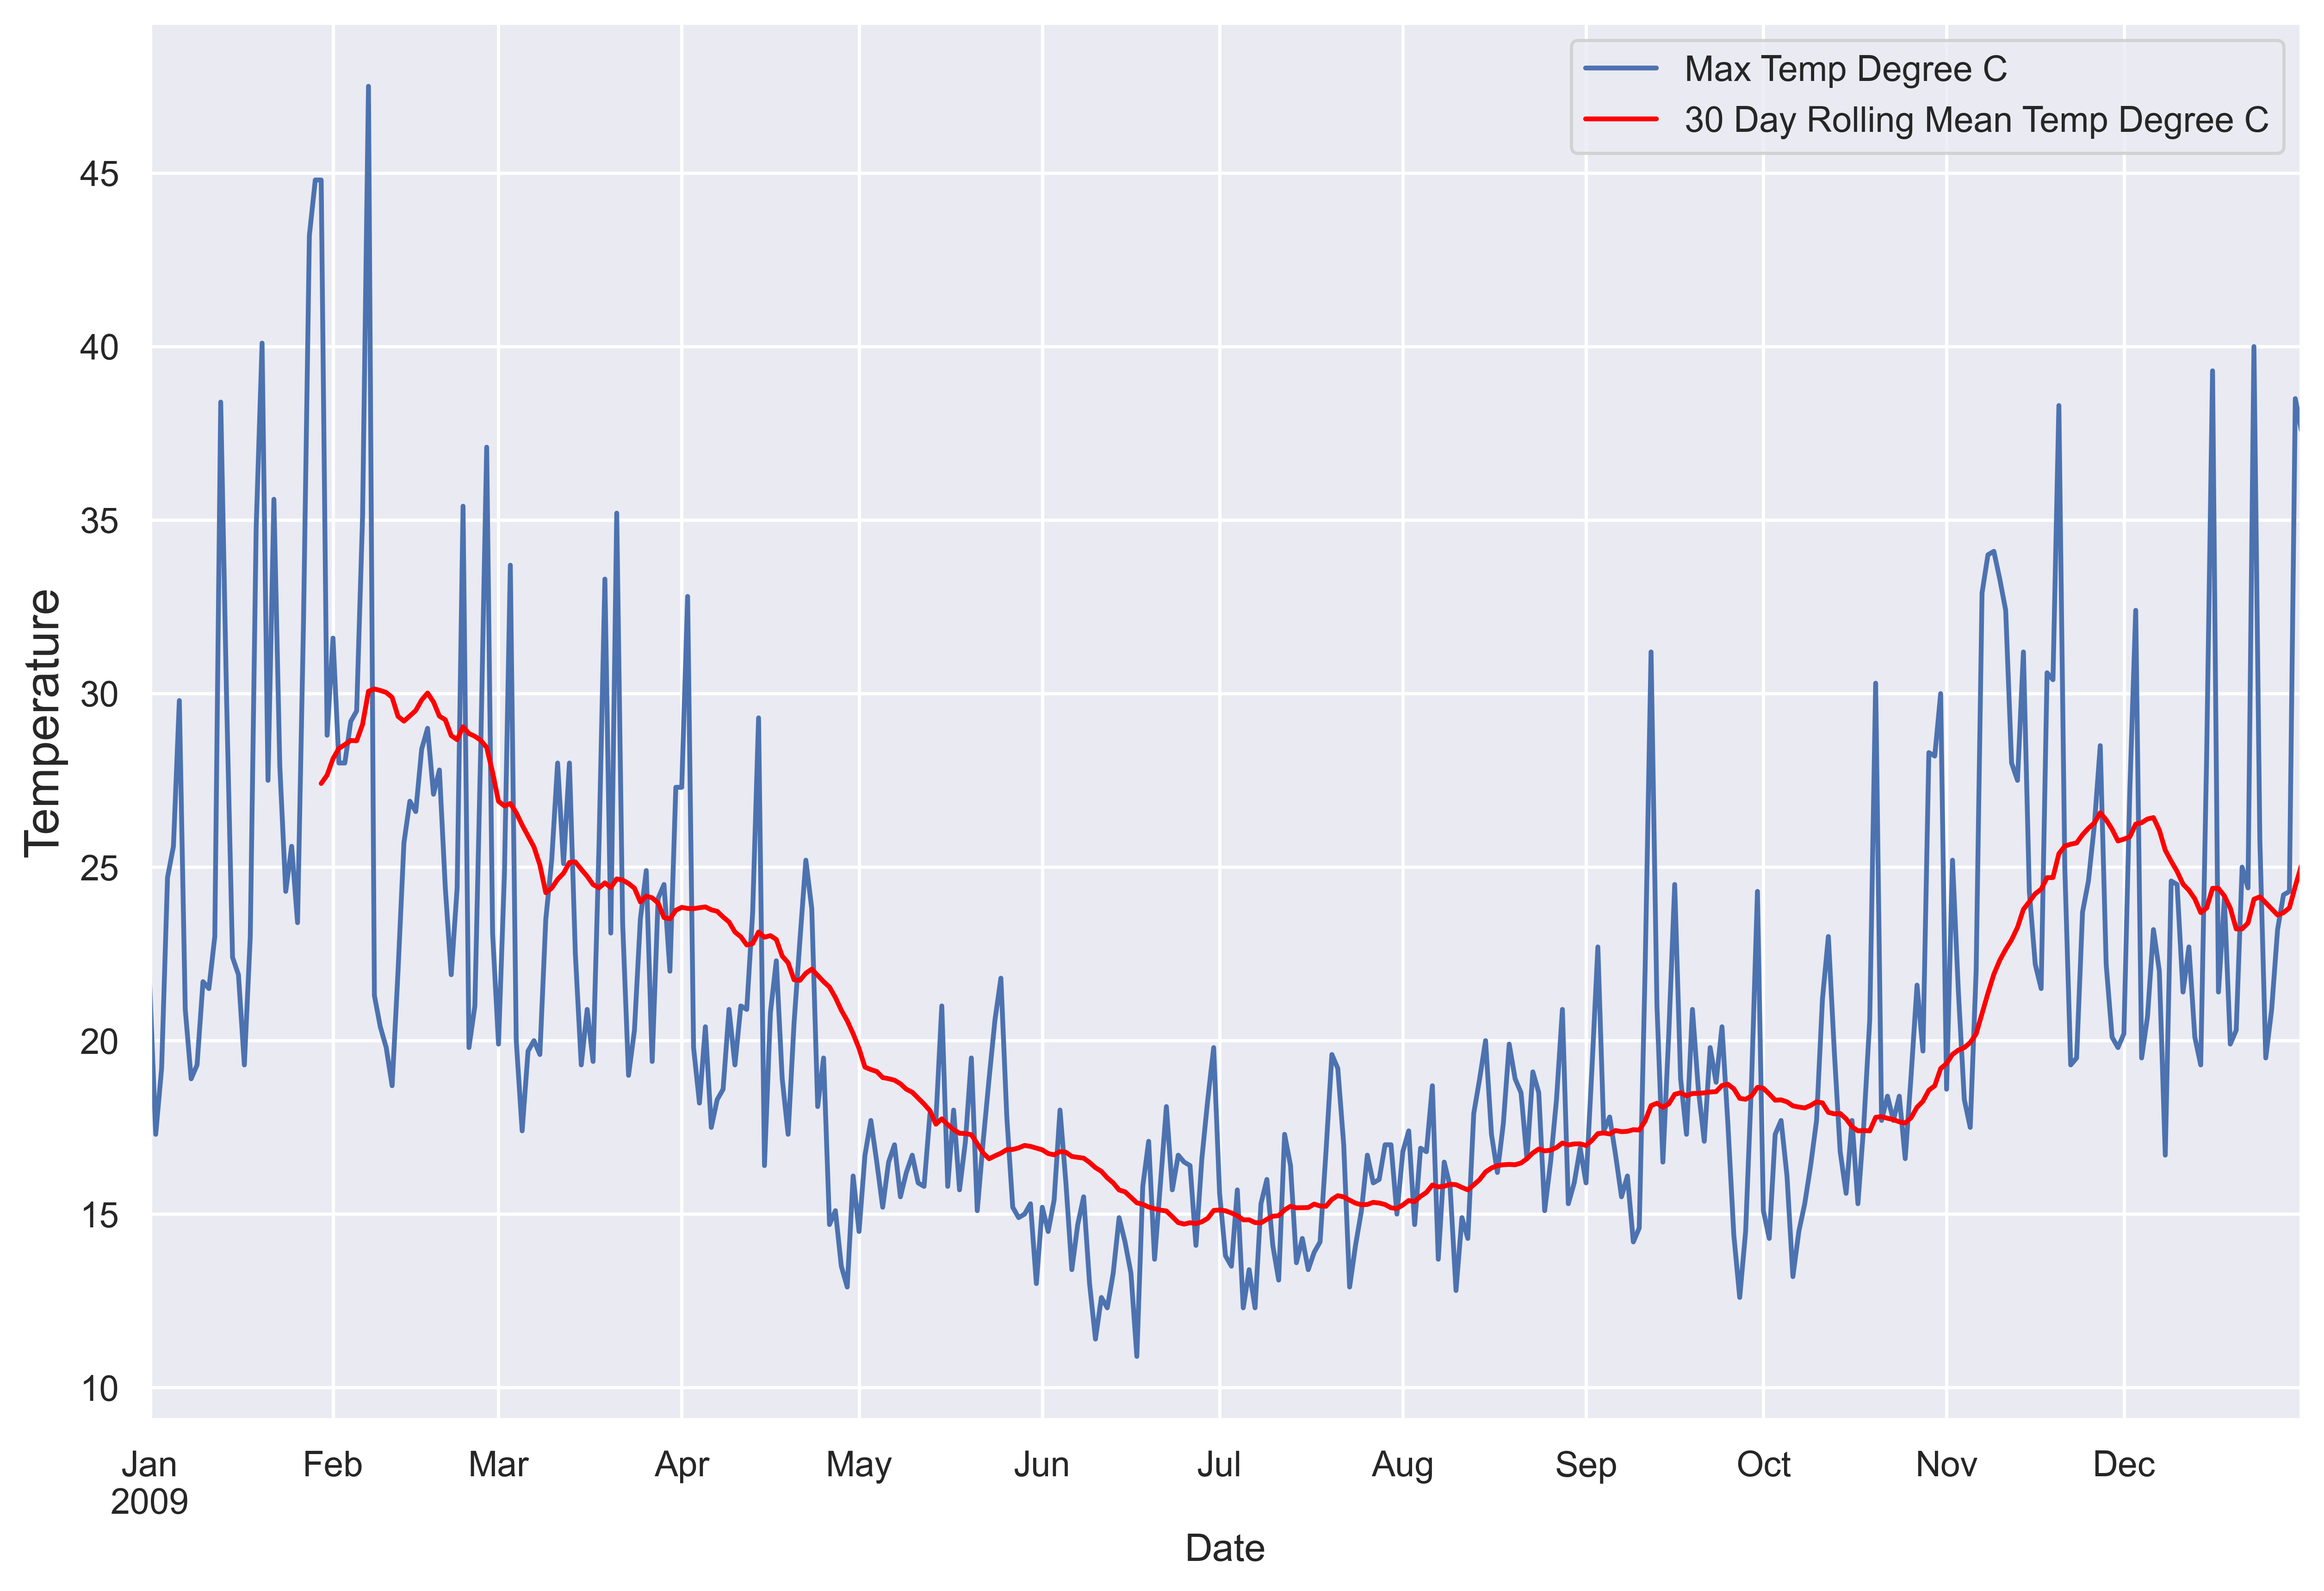

In [79]:
plt.figure(figsize = (12, 8), dpi = 500)
mel_temp_df.iloc[Year_Index(2009), 0].plot() # Temp Data.
mel_temp_df.iloc[Year_Index(2009), 0].rolling(window = 30).mean().plot(c = "red") # 30 day rolling mean.
plt.ylabel(ylabel = "Temperature", fontsize = 15)
plt.legend(labels = ["Max Temp Degree C", "30 Day Rolling Mean Temp Degree C"])
plt.show()